# Car Recommendation

# 1.Fetch data

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")
import pandas as pd
A=pd.read_csv("E:\data science\Cars93 (1).csv")
A.head()

,id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


# 2.standarize the data

In [2]:
B=A[["Price","MPG.city"]]
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
C=pd.DataFrame(mm.fit_transform(B),columns=["Price","MPG.city"])

In [3]:
C.head()

,Price,MPG.city
0,0.155963,0.322581
1,0.486239,0.096774
2,0.398165,0.161290
3,0.555963,0.129032
4,0.414679,0.225806


# 3.deciding the requried no. clusters

In [4]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=10)
model=km.fit(C)
model.labels_

array([8, 9, 2, 9, 2, 7, 5, 5, 2, 9, 0, 8, 1, 7, 7, 5, 5, 5, 9, 7, 8, 2,
       3, 1, 1, 5, 7, 2, 3, 7, 3, 1, 1, 7, 8, 5, 7, 5, 4, 3, 8, 4, 8, 3,
       1, 1, 7, 0, 2, 9, 9, 9, 3, 3, 8, 5, 9, 2, 6, 8, 7, 3, 2, 3, 8, 5,
       7, 8, 8, 5, 5, 8, 3, 1, 7, 7, 2, 2, 3, 3, 1, 8, 4, 3, 8, 7, 5, 1,
       5, 7, 5, 2, 2])

In [5]:
Q=pd.DataFrame(model.labels_,columns=["Cluster"])
Q.groupby(by="Cluster")["Cluster"].count()

Cluster
0     2
1    10
2    12
3    13
4     3
5    15
6     1
7    15
8    14
9     8
Name: Cluster, dtype: int64

In [6]:
K=range(2,20,1)
WCSS=[]
for i in K:
    km=KMeans(n_clusters=i)
    model=km.fit(C)
    WCSS.append(model.inertia_)

In [7]:
WCSS

[2.984556204508492,
 1.7604339512829656,
 1.2111248917250903,
 0.8103577450268153,
 0.5533447368852447,
 0.4430024390535746,
 0.3630899651247165,
 0.32077643727665933,
 0.2778537638598535,
 0.26068847775534737,
 0.22487817771605392,
 0.20066690169132093,
 0.17784516591613556,
 0.154081966830844,
 0.13795069858501047,
 0.12928345824189463,
 0.11547394287238745,
 0.10529296557788523]

Text(0.5, 1.0, 'Elbow curve car data')

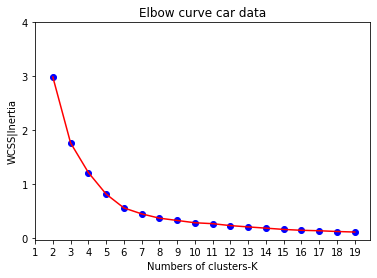

In [8]:
import matplotlib.pyplot as plt
plt.scatter(K,WCSS,c="blue")
plt.plot(K,WCSS,c="red")
plt.xlabel("Numbers of clusters-K")
plt.ylabel("WCSS|Inertia")
plt.xticks(range(1,20,1))
plt.yticks(range(0,5,1))
plt.title("Elbow curve car data")

# 4.Make new cluster model

In [9]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=6)
model=km.fit(C)
model.labels_

array([3, 5, 5, 5, 5, 3, 0, 0, 0, 5, 5, 3, 3, 0, 3, 0, 0, 0, 5, 0, 3, 5,
       1, 3, 3, 0, 3, 0, 1, 0, 1, 3, 3, 3, 3, 0, 0, 0, 4, 1, 3, 4, 3, 1,
       3, 1, 3, 2, 5, 5, 5, 5, 1, 1, 3, 0, 5, 5, 2, 3, 0, 1, 0, 1, 3, 0,
       0, 3, 3, 0, 0, 3, 1, 3, 0, 0, 0, 5, 1, 1, 3, 3, 4, 1, 3, 3, 0, 3,
       0, 0, 0, 0, 0])

Text(0, 0.5, 'Mileage')

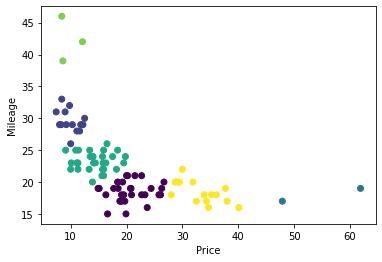

In [10]:
import matplotlib.pyplot as plt
plt.scatter(B.Price,B['MPG.city'],c=model.labels_)
plt.xlabel("Price")
plt.ylabel("Mileage")

In [11]:
model.cluster_centers_

array([[0.24201835, 0.11182796],
       [0.04718218, 0.46774194],
       [0.87155963, 0.09677419],
       [0.12900981, 0.26585095],
       [0.04220183, 0.88172043],
       [0.47547401, 0.10967742]])

In [12]:
E=pd.DataFrame(mm.inverse_transform(model.cluster_centers_),columns=["X","Y"])

In [13]:
E

,X,Y
0,20.590000,18.466667
1,9.971429,29.500000
2,54.900000,18.000000
3,14.431034,23.241379
4,9.700000,42.333333
5,33.313333,18.400000


In [14]:
B["X"]=E.X
B["Y"]=E.Y
B["Clusters"]=model.labels_
B["Make"]=A.Make

In [15]:
B.head()

,Price,MPG.city,X,Y,Clusters,Make
0,15.9,25,20.590000,18.466667,3,Acura Integra
1,33.9,18,9.971429,29.500000,5,Acura Legend
2,29.1,20,54.900000,18.000000,5,Audi 90
3,37.7,19,14.431034,23.241379,5,Audi 100
4,30.0,22,9.700000,42.333333,5,BMW 535i


Text(0, 0.5, 'Millage in city')

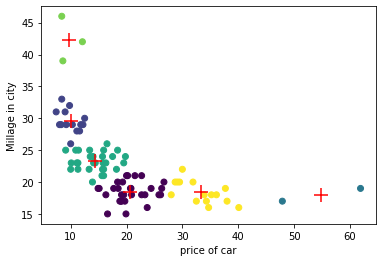

In [16]:
plt.scatter(B.Price,B["MPG.city"],c=B.Clusters)
plt.scatter(E.X,E.Y,c="red",marker="+",s=200)
plt.xlabel("price of car")
plt.ylabel("Millage in city")

# Get Cars recommendations:

In [20]:
km = KMeans(n_clusters=4)
model = km.fit(C)
B["Clusters"]=model.labels_

In [21]:
B["Make"]=A.Make

In [22]:
B

,Price,MPG.city,X,Y,Clusters,Make
0,15.9,25,20.590000,18.466667,0,Acura Integra
1,33.9,18,9.971429,29.500000,2,Acura Legend
2,29.1,20,54.900000,18.000000,2,Audi 90
3,37.7,19,14.431034,23.241379,2,Audi 100
4,30.0,22,9.700000,42.333333,2,BMW 535i
...,...,...,...,...,...,...
88,19.7,17,NaN,NaN,1,Volkswagen Eurovan
89,20.0,21,NaN,NaN,1,Volkswagen Passat
90,23.3,18,NaN,NaN,1,Volkswagen Corrado
91,22.7,21,NaN,NaN,1,Volvo 240


In [26]:
cm = input("Enter a car Make to see similar cars: ")

cluster_number_of_given_car = list(B[B.Make==cm].Clusters)[0]

W = list(B[B.Clusters == cluster_number_of_given_car].Make)
W.remove(cm)

print("Entered Car: ",cm)
print("Similar Cars: ",W)

Enter a car Make to see similar cars: Chevrolet Corvette
Entered Car:  Chevrolet Corvette
Similar Cars:  ['Acura Legend', 'Audi 90', 'Audi 100', 'BMW 535i', 'Cadillac DeVille', 'Cadillac Seville', 'Chrysler Imperial', 'Infiniti Q45', 'Lexus ES300', 'Lexus SC300', 'Lincoln Continental', 'Lincoln Town_Car', 'Mazda RX-7', 'Mercedes-Benz 190E', 'Mercedes-Benz 300E', 'Saab 900']
